In [ ]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora



In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1f9c8d5b9181e00c6881a8259b77c240afa42bd97e65fd800c53c178c13bd30d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
## Visualization libraries
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv to Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'])) 

In [ ]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df.rename(columns = {'reviews.text':'text'}, inplace = True)

In [ ]:
df2 = df[['text','categories']]

In [ ]:
df2.head()

,text,categories
0,I thought it would be as big as small paper bu...,"Computers,Electronics Features,Tablets,Electro..."
1,This kindle is light and easy to use especiall...,"Computers,Electronics Features,Tablets,Electro..."
2,Didnt know how much i'd use a kindle so went f...,"Computers,Electronics Features,Tablets,Electro..."
3,I am 100 happy with my purchase. I caught it o...,"Computers,Electronics Features,Tablets,Electro..."
4,Solid entry level Kindle. Great for kids. Gift...,"Computers,Electronics Features,Tablets,Electro..."


In [ ]:
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
## identifying new stop words

stops = stops.union({'love', 'use', 'new', 'one', 'get', 'got', 'buy', 'back', 'best', 'purchased', 'bought', 'also', 'would', 'product'}) 

In [ ]:
vectorizer = CountVectorizer(stop_words=stops)

In [ ]:
X = vectorizer.fit_transform(df2['text'])

In [ ]:
lda = LatentDirichletAllocation(
    n_components=10,
    random_state=12345,
)

In [ ]:
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [ ]:
def plot_top_words(model, feature_names, n_top_words=15):
    fig, axes = plt.subplots(2,5, figsize=(30,15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

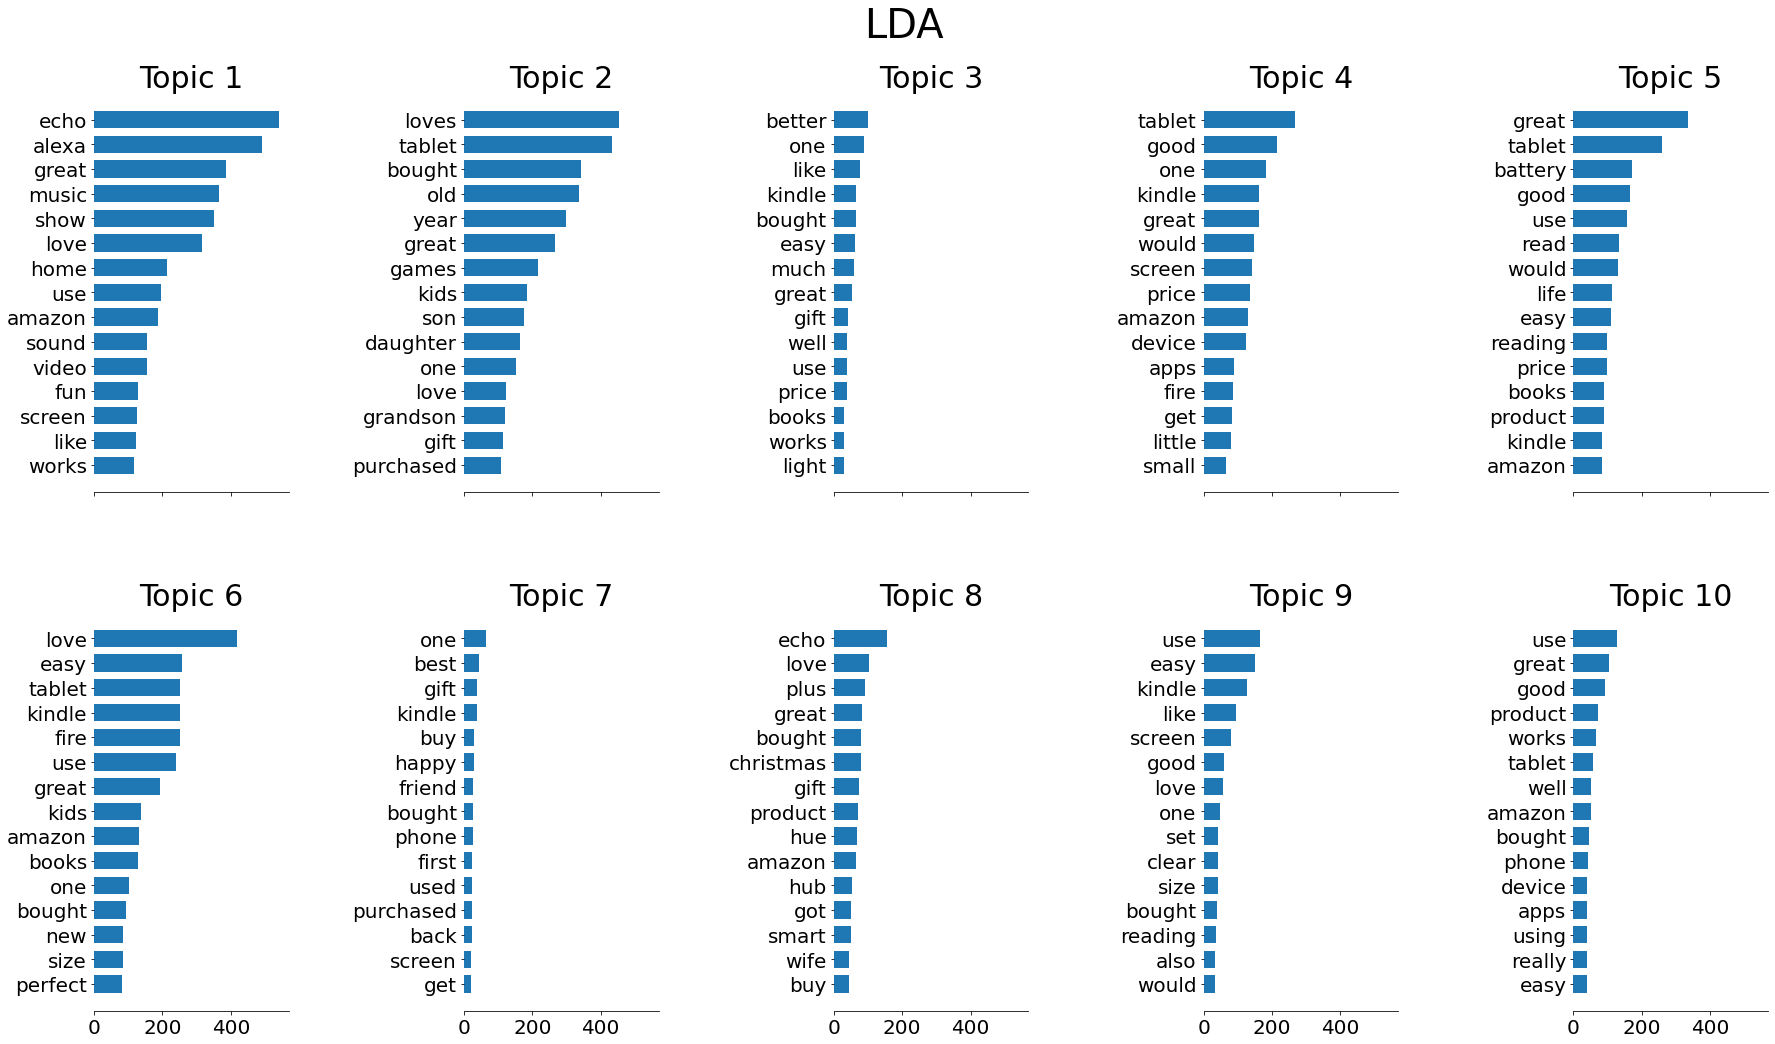

In [ ]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);

In [ ]:
## identifying new stop words

##stops = stops.union({
    ## 'love', 'use', 'new', 'one', 'get', 'got', 'buy', 'back', 'best', 'purchased', 'bought', 'also', 'would', 'product'}] 

In [ ]:
## Second iteration with new stop words added

In [ ]:
def plot_top_words(model, feature_names, n_top_words=15):
    fig, axes = plt.subplots(2,5, figsize=(30,15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

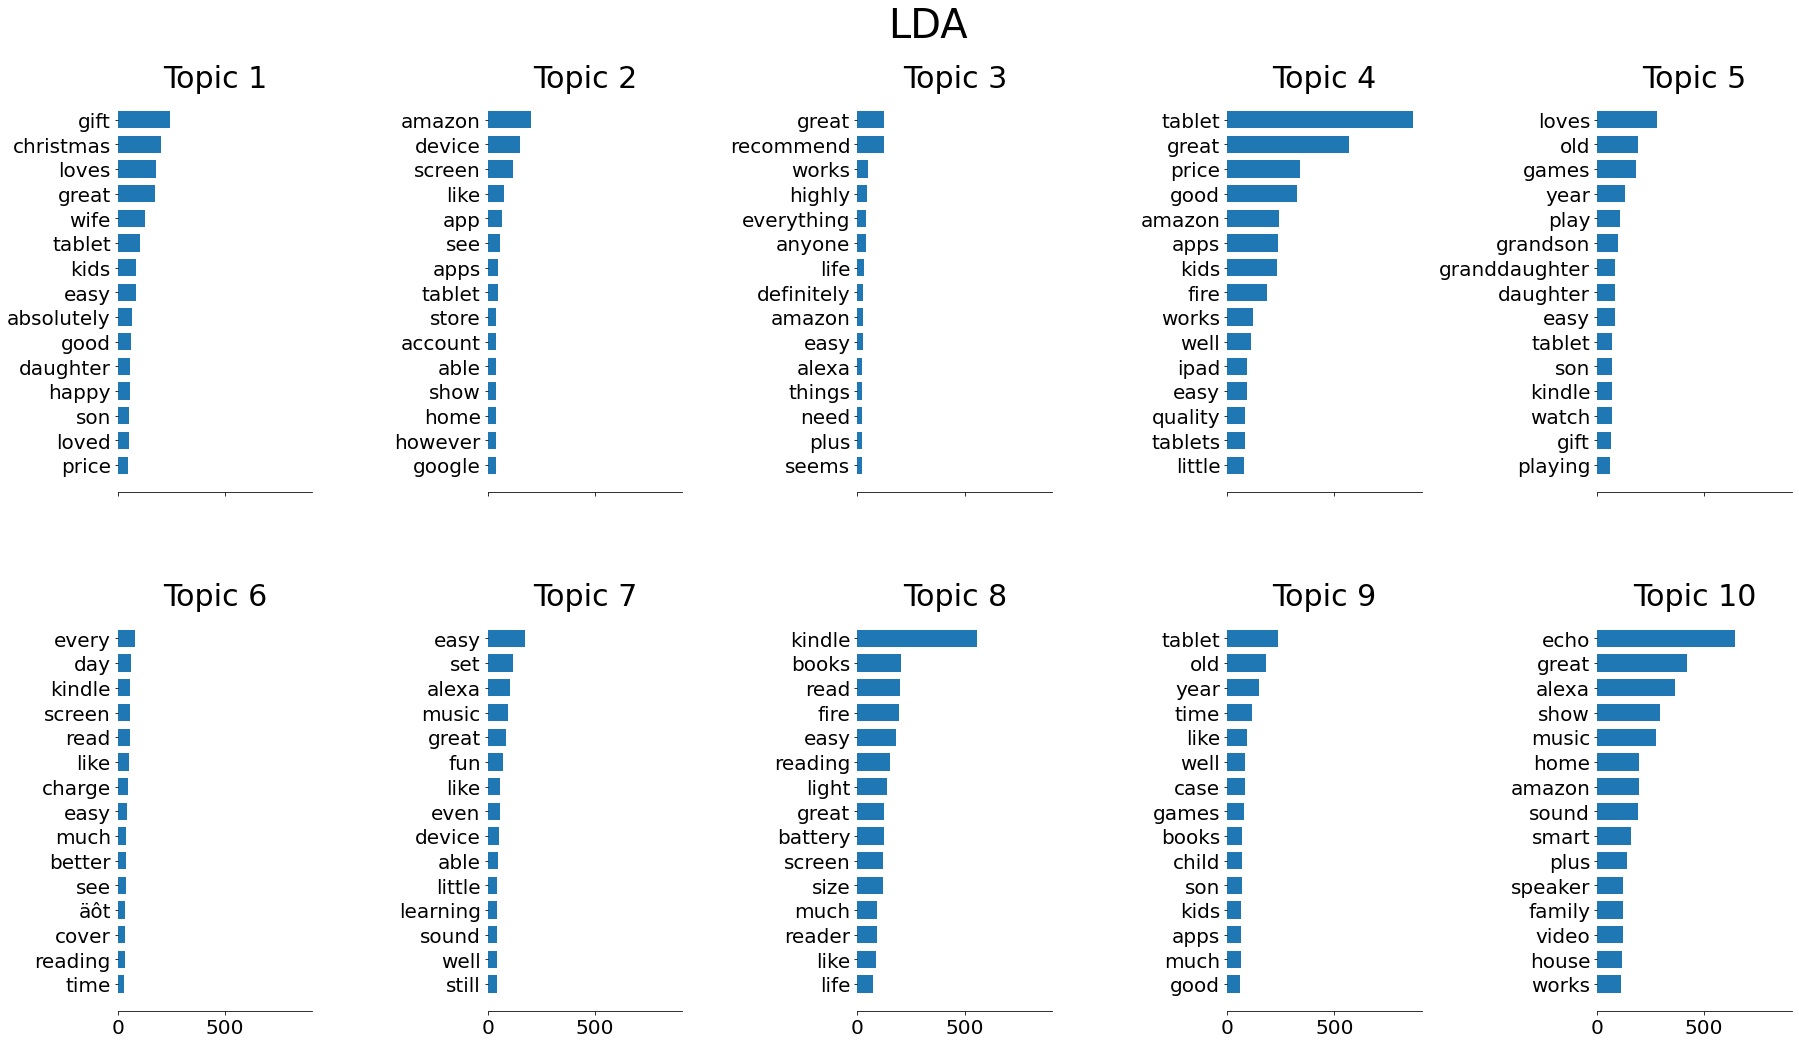

In [ ]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);

In [ ]:
## choosing 5 topics instead of 10 and 10 top words instead of 15

In [ ]:
lda2 = LatentDirichletAllocation(
    n_components=5,
    random_state=12345,
)

In [ ]:
lda2.fit(X)

LatentDirichletAllocation(n_components=5, random_state=12345)

In [ ]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2,5, figsize=(30,15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

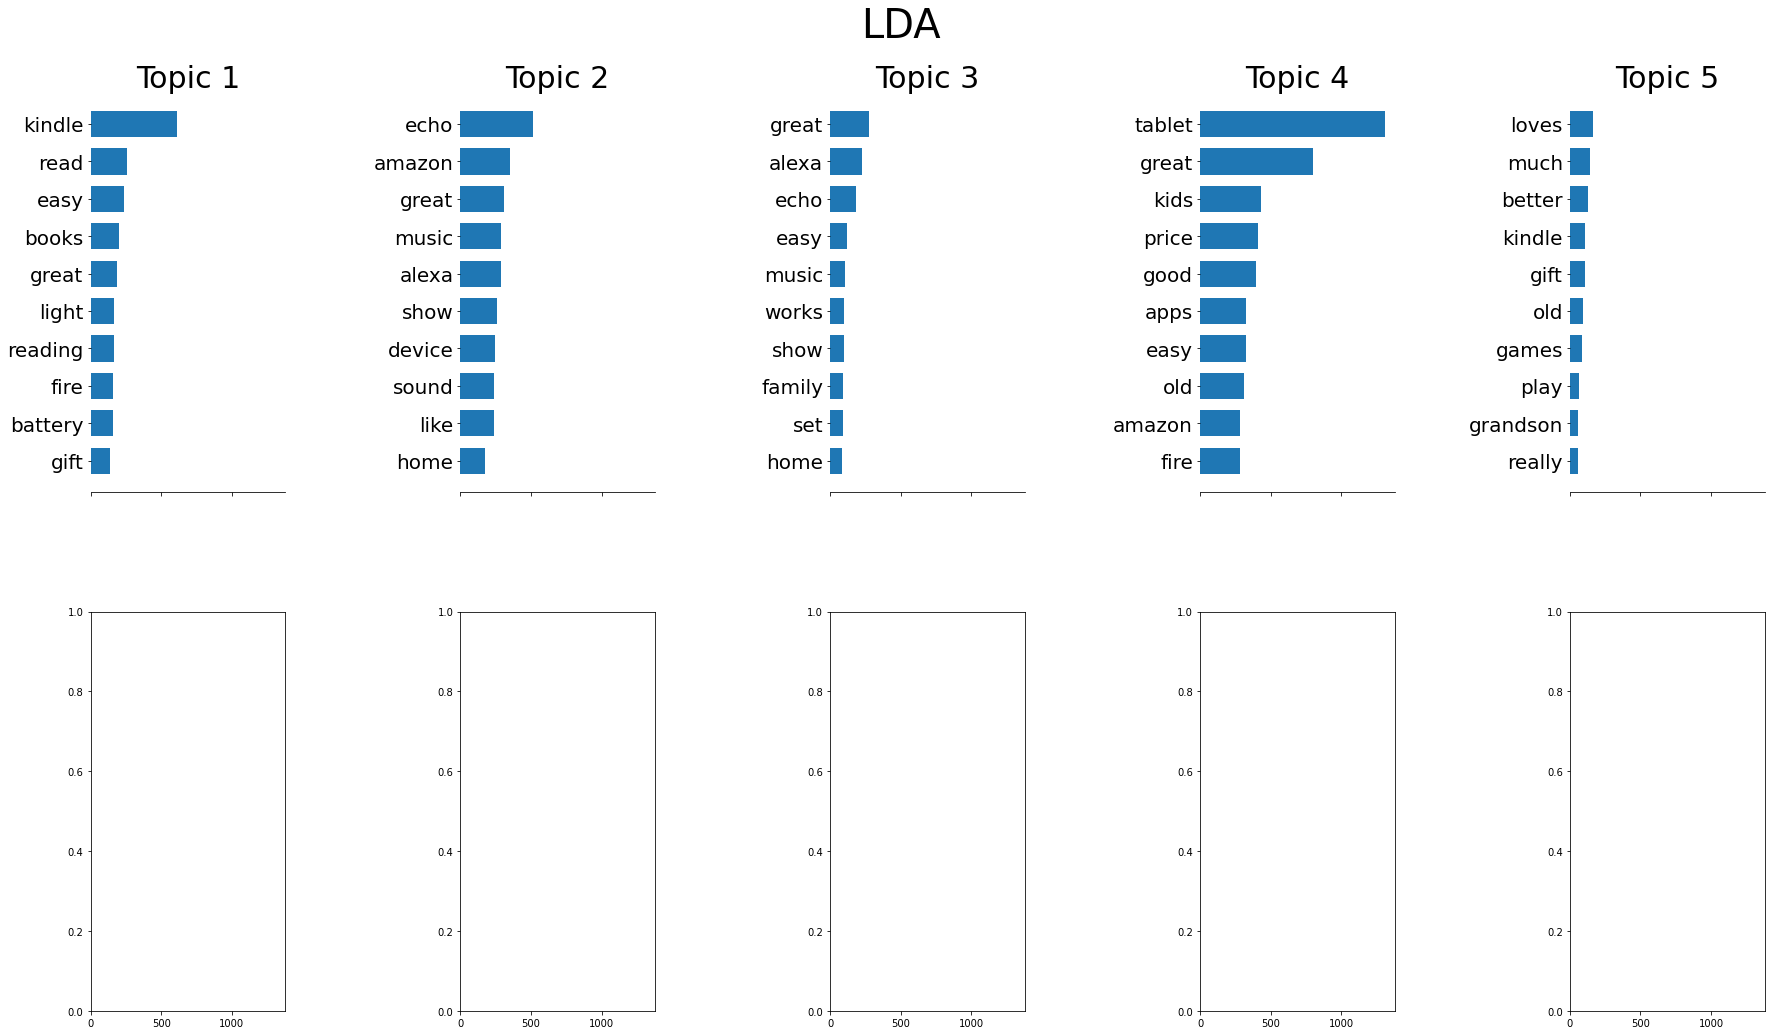

In [ ]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda2, feature_names);

In [ ]:
## VISUALIZING THE LDA

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
pyLDAvis.sklearn.prepare(lda2, X, vectorizer)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.109832  0.031889       1        1  30.615608
1      0.140902 -0.014413       2        1  27.426114
0     -0.119317 -0.151980       3        1  19.742307
2      0.165141 -0.009330       4        1  12.495032
4     -0.076893  0.143835       5        1   9.720939, topic_info=           Term         Freq        Total Category  logprob  loglift
4557     tablet  1225.000000  1225.000000  Default  30.0000  30.0000
2594     kindle   711.000000   711.000000  Default  29.0000  29.0000
1536       echo   659.000000   659.000000  Default  28.0000  28.0000
273       alexa   482.000000   482.000000  Default  27.0000  27.0000
2809      loves   468.000000   468.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
891   christmas    38.499633   199.517635   Topic5  -5.1673   0.6856
4025     screen    48.259476   467.443098   Topic5  -4.9413   0.0602
1875      first    33.813491   173.907568   Topic5  -5.2970   0.6932
2719       like    39.281309   512.361174   Topic5  -5.1472  -0.2374
1526       easy    31.440240   766.452265   Topic5  -5.3698  -0.8628

[383 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
10        5  0.864784   11yr
34        3  0.154592    1st
34        4  0.154592    1st
34        5  0.695662    1st
79        5  0.926975    4th
...     ...       ...    ...
5221      1  0.963278  young
5245      4  0.933289   äôre
5246      2  0.513201    äôs
5246      4  0.399157    äôs
5246      5  0.079831    äôs

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])